# Final Project

You will be asked to download data by yourselves and answer several data science questions through this final project. This project has two parts.


## Part 1 (15 Points):

This part contains 10 different data science questions that you are asked to answer. You need to download the corresponding data and write code to process the data to answer these questions. For each question, you need to provide your code to anser this question, as well as final asnwers. Each question will be worth 1.5 points in this part. 


## Final Submission:

Your final submission will contain two files:

1. The first would be this notebook. You need to provide code for your answers as well as your answers. You also need to provide visualization and executive summary using Markdown in this notebook. 

2. The second is the html version of this notebook. 


## Part 1

First, you need to download the most recent datasets containing listing and reviews in **Los Angeles** from (insidearibnb.com)[http://insideairbnb.com/get-the-data.html]. You will then need to provide the code as well as answers to the following questions.

**To make sure that you downloaded the right dataset, your solution to Question 1 should be:**
1. **Number of unique listings = 43763**
2. **Number of unique hosts = 26730**

### Question 1: How many unique listings are there in the LA dataset? How many unique hosts are there?
**Question 1 Answer:**

**1** - the number of unique listings: 43763

**2** - the number of unique hosts: 26730


(You need to write your answer in this markdown cell)

In [71]:
# You need to provide the code to answer the previous quesiton
# (you should also briefly explain your data structure -- 
# where do you put your data and how you get your data)

import pandas as pd
import numpy as np
#download file from the link for LA area and save in a same folder with this notebook
#read file to the dataset
listings = pd.read_csv("listings.csv")
# 1 - the number of unique listings in the dataset
num_list = listings.id.nunique()
# 2 - the number of unique hosts in the dataset 
num_host = listings.host_id.nunique()
num_list,num_host

(43763, 26730)

### Question 2: What is the mean, median, standard deviation, minimum and maximum of the number of listings per host in LA? (for each host, you only need to consider the listings from LA)
**Question 2 Answer:**

**mean:** 1.6372240927796484

**median:** 1.0

**standard deviation:** 2.4972817129321685

**min:** 1

**max:** 152

(You need to write your answer in this markdown cell)

In [72]:
# You need to provide the code to answer the previous quesiton
#Based on the information provided by the website, we already knew that this dataset had been cleansed.

df1 = listings.groupby(by=["host_id"]).apply(lambda x:pd.Series({"listing_per_host":x["id"].count()})).reset_index()
mean= df1.listing_per_host.mean()
median= df1.listing_per_host.median()
std= df1.listing_per_host.std()
maxs=df1.listing_per_host.max()
mins=df1.listing_per_host.min()

(mean,median,std,mins,maxs)

(1.6372240927796484, 1.0, 2.4972817129321685, 1, 152)

### Question 3: What is the average and standard deviation number of listings for a super host versus a non-super host? Does super host or non-super host have more listings on average?
**Question 3 Answer:**

**For a super host:**

mean: 1.753056          

standard deviation: 1.902281


**For a non-super host:**

mean: 1.603263           

standard deviation: 2.646289


(You need to write your answer in this markdown cell)

In [73]:
# You need to provide the code to answer the previous quesiton

listings3 = listings.drop_duplicates(keep="first",subset=["host_id"]).\
      groupby(by=["host_is_superhost"])["calculated_host_listings_count"].agg([np.mean,np.std])
listings3

,mean,std
host_is_superhost,,
f,1.603263,2.646289
t,1.753056,1.902281


### Question 4: What are the unique types of host verifications are there? (It doesn't matter if you include "None" or empty string as a type)
**Question 4 Answer:**

['email', 'phone', 'facebook', 'reviews', 'kba', 'jumio', 'government_id', 'offline_government_id', 'selfie', 'identity_manual', 'work_email', 'google', 'manual_online', 'manual_offline', '', 'sent_id', 'sesame', 'sesame_offline', 'None', 'photographer', 'zhima_selfie', 'weibo']

(You need to write your answer in this markdown cell)

In [74]:
# You need to provide the code to answer the previous quesiton

types = []
listings_type = listings.host_verifications.str.strip("[]")
for i in listings_type:
    i = i.replace("\'","").split(", ")
    for j in range(len(i)):
        if i[j] in types:
            continue
        else:
            types.append(i[j])
print (types)

['email', 'phone', 'facebook', 'reviews', 'kba', 'jumio', 'government_id', 'offline_government_id', 'selfie', 'identity_manual', 'work_email', 'google', 'manual_online', 'manual_offline', '', 'sent_id', 'sesame', 'sesame_offline', 'None', 'photographer', 'zhima_selfie', 'weibo']


### Question 5: What are the five most popular verification types of hosts? For each type of the top five verifications, how many percent of hosts verify that type?
**Question 5 Answer:**

**type: percent**

'phone': 0.9937523381967827

'email': 0.9353909465020576

'reviews': 0.7422745978301534

'government_id': 0.464983164983165

'jumio': 0.45173961840628507

(You need to write your answer in this markdown cell)

In [75]:
# You need to provide the code to answer the previous quesiton

listing5 = listings.loc[:,["host_id","host_verifications"]].drop_duplicates(keep = "first")
type_dict = {}
#five popular verification types
for index,row in listing5.iterrows():
    j = row['host_verifications'].strip('[]').replace("'","").split(', ')
    for t in j:
        if t not in type_dict:
            type_dict[t]=1
        else:
            type_dict[t]+=1
five_popular = sorted(type_dict.items(),key = lambda x:x[1],reverse = True)[:5]
#combination of percent and type
five_perc={}
for i in range(len(five_popular)):
    five_perc[five_popular[i][0]] = five_popular[i][1]/len(listing5.host_id) 
five_perc

{'phone': 0.9937523381967827,
 'email': 0.9353909465020576,
 'reviews': 0.7422745978301534,
 'government_id': 0.464983164983165,
 'jumio': 0.45173961840628507}

### Question 6: What is the mean, standard deviation of the average price of a listing in Los Angles from 01/01/2019 to 03/01/2019 (inclusive)? (For listings that are not available in this time, you should not count them in the average price.)

**Question 6 Answer:**

**Mean:** 213.2409167657559

**Standard Deviation:** 577.3961352033027

(You need to write your answer in this markdown cell)

In [76]:
# You need to provide the code to answer the previous quesiton

from datetime import datetime
# read the new file 
calendar = pd.read_csv("calendar.csv",parse_dates = ["date"])
#change the price column from the string to the float for following calculations
calendar["price"] = calendar["price"].apply(lambda x:float(str(x).replace("$","").replace(",","")))
#filter all the available data from 2019-01-01 to 2019-03-01
calendar6 = calendar.loc[(calendar.date >= '2019-01-01') & (calendar.date <= '2019-03-01') & (calendar.available == "t")]

(calendar6.groupby("listing_id")["price"].mean().mean(),calendar6.groupby("listing_id")["price"].mean().std())


(213.2409167657559, 577.3961352033027)

### Question 7: For reviews that are written in Jan, 2016, what are the most popular ten words except stopping words? What about reviews written in March, 2017 and April, 2018?
**Hint**: You need to use NTLK stopping words to find the stopping words in Python. You also need to remove punctuation and numbers

**Question 7 Answer:**

**Jan, 2016**

['great', 'stay', 'place', 'location', 'would', 'us', 'house', 'nice', 'recommend', 'everything', 'clean']

**March, 2017**

['great', 'place', 'stay', 'location', 'nice', 'would', 'recommend', 'clean', 'definitely', 'host', 'everything']

**April, 2018**

['place', 'great', 'stay', 'location', 'recommend', 'nice', 'would', 'clean', 'definitely', 'host', 'everything']

(You need to write your answer in this markdown cell)

In [77]:
# You need to provide the code to answer the previous quesiton

reviews = pd.read_csv("reviews.csv",parse_dates=["date"])
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop = set(stopwords.words('english'))
#for Jan,2016
df_jan1 = reviews.loc[(reviews.date >= '2016-01-01')&(reviews.date <= '2016-01-31')]
df_jan = df_jan1.copy()
c_jan = pd.DataFrame(df_jan["comments"].str.replace('[^\w\s] ','').str.replace('[^\w\s]','')\
                     .str.lower().str.replace('\d+', '').str.replace('  ','')).reset_index(drop=True)
c_jan_voc = {}
for index,row in c_jan.iterrows():
    v = str(row['comments']).split(' ')
    v = set(v)
    for j in v:
        t = j.replace("'","")
        if t not in stop:
            if t not in c_jan_voc:
                c_jan_voc[t]=1
            else:
                c_jan_voc[t]+=1
                
#ten_popular_jan = sorted(c_jan_voc.items(),key = lambda x:x[1],reverse = True)[:11]
ten_popular_jan = sorted(c_jan_voc, key=c_jan_voc.__getitem__, reverse=True)[:11]

#for March,2017
df_mar = reviews.loc[(reviews.date >= '2017-03-01')&(reviews.date <= '2017-03-31')]
c_mar = pd.DataFrame(df_mar["comments"].str.replace('[^\w\s] ','').str.replace('[^\w\s]','')\
                     .str.lower().str.replace('\d+', '').str.replace('  ','')).reset_index(drop=True)
c_mar_voc = {}
for index,row in c_mar.iterrows():
    v = str(row['comments']).split(' ')
    v = set(v)
    for j in v:
        t = j.replace("'","")
        if t not in stop:
            if t not in c_mar_voc:
                c_mar_voc[t]=1
            else:
                c_mar_voc[t]+=1    
#ten_popular_mar = sorted(c_mar_voc.items(),key = lambda x:x[1],reverse = True)[:11]
ten_popular_mar = sorted(c_mar_voc, key=c_mar_voc.__getitem__, reverse=True)[:11]

#for April,2018
df_apr=reviews.loc[(reviews.date >= '2018-04-01')&(reviews.date <= '2018-04-30')]
c_apr = pd.DataFrame(df_apr["comments"].str.replace('[^\w\s] ','').str.replace('[^\w\s]','')\
                     .str.lower().str.replace('\d+', '').str.replace('  ','')).reset_index(drop=True)
c_apr_voc = {}
for index,row in c_apr.iterrows():
    v = str(row['comments']).split(' ')
    v = set(v)
    for j in v:
        t = j.replace("'","")
        if t not in stop:
            if t not in c_apr_voc:
                c_apr_voc[t]=1
            else:
                c_apr_voc[t]+=1
                
#ten_popular_apr = sorted(c_apr_voc.items(),key = lambda x:x[1],reverse = True)[:11]
ten_popular_apr = sorted(c_apr_voc, key=c_apr_voc.__getitem__, reverse=True)[0:11]

print (ten_popular_jan)
print (ten_popular_mar)
print (ten_popular_apr)

['great', 'stay', 'place', 'location', 'would', 'us', 'house', 'nice', 'recommend', 'everything', 'clean']
['great', 'place', 'stay', 'location', 'nice', 'would', 'recommend', 'clean', 'definitely', 'host', 'everything']
['place', 'great', 'stay', 'location', 'recommend', 'nice', 'would', 'clean', 'definitely', 'host', 'everything']


### Question 8: Which five zipcode has the highest average listing price and has at least 30 listings (again only considering available dates) between 2019-01-01 to 2019-02-01 (inclusive)? What are these listing prices? What are the number of active listings and number of hosts in these top five zipcodes (a listing is active if it has at least one available date in the calendar data)?

**Question 8 Answer:**

**1 - zipcode: listing prices**

90210:1440.587339

37738:1178.687500

90265:1119.410276

90069:776.265778

90077:740.833933

**2 - zipcode: num_of_host: num_of_active_listing** 

37738: 1: 1

90069: 508: 529

90077: 66: 66

90210: 257: 297

90265: 379: 473


(You need to write your answer in this markdown cell)

In [78]:
# You need to provide the code to answer the previous quesiton

df_calendar8 = calendar.loc[(calendar.date >= "2019-1-1") & (calendar.date <= "2019-2-1"),:]
df_listing =listings.loc[:,["id","zipcode","host_id"]]
df_join = df_calendar8.merge(df_listing, how="inner", left_on ="listing_id",right_on ="id")
df_join["available"] = df_join["available"].apply(lambda x: True if x =="t" else False)
df_join["price"] = df_join["price"].apply(lambda x: float(str(x).replace("$","").replace(",","")))
df_true=df_join.loc[df_join["available"]== True,:]
#top five codes with their average prices
df8 = df_true.groupby("zipcode").filter(lambda x: len(x)>=30)
zipcodeseries=df8.groupby(by=["zipcode"]).price.mean().sort_values(ascending=False).head(5)
print(zipcodeseries)

# the number of active listings and number of hosts in these top five zipcodes 
fivezipcode = list(zipcodeseries.index)
df_five=df_join.loc[df_join["zipcode"].isin(fivezipcode),:]
def find(sub):
    num_of_host=sub["host_id"].nunique()
    listing_a=sub.groupby(by=["listing_id"]).available.sum().reset_index()
    listing_a["available"]=listing_a.available.apply(lambda x:1 if x!=0 else 0)
    num_of_active_listing = listing_a["available"].sum()
    return pd.Series({"num_of_host":num_of_host,"num_of_active_listing":num_of_active_listing})
result = df_five.groupby("zipcode").apply(find)
result


zipcode
90210    1440.587339
37738    1178.687500
90265    1119.410276
90069     776.265778
90077     740.833933
Name: price, dtype: float64


,num_of_host,num_of_active_listing
zipcode,,
37738,1,1
90069,508,529
90077,66,66
90210,257,297
90265,379,473


### Question 9: Focusing on the data from 2019-01-01 to 2019-04-01 (inclusive), what are five zipcodes that have at least 30 listings and have the largest absolute difference between the average prices on weekends versus the average prices on weekdays? (Weekends = Saturday and Sunday). Please give the zipcodes as well as the listing prices
**Question 9 Answer:**

**zipcode: listing prices**

37738:65.607692

90067:52.746269

91384:50.013584

91210:20.896619

90210:17.966450


(You need to write your answer in this markdown cell)

In [79]:
# You need to provide the code to answer the previous quesiton

calendar9 = calendar.loc[(calendar.available=="t")&(calendar.date>='2019-1-1')&(calendar.date<='2019-4-1')]
listings9 = listings.loc[:,["id","zipcode"]]
join9 = calendar9.merge(listings9, "inner", left_on = "listing_id", right_on = "id")

morethan = join9.groupby("zipcode").filter(lambda x:len(x)>=30)
weekdays= morethan.loc[morethan.date.dt.dayofweek.isin([0,1,2,3,4])]
weekends = morethan.loc[(morethan.date.dt.dayofweek.isin([5,6]))]
adsdiff = pd.DataFrame(abs(weekends.groupby("zipcode").price.mean()-weekdays.groupby("zipcode").price.mean())\
                       .sort_values(ascending = False)).reset_index().head()
adsdiff

,zipcode,price
0,37738,65.607692
1,90067,52.746269
2,91384,50.013584
3,91210,20.896619
4,90210,17.966450


### Question 10: What is the average and standard deviation of the daily total capacity at Airbnb Los Angeles from 2019-01-01 to 2019-04-01? The daily total capacity in a day is the number of beds that are available in that given date. What is the average and standard deviation of the daily price per bed at Airbnb Los Angeles from 2019-01-01 to 2019-04-01?
**Question 10 Answer:**

**1** 

mean: 51105.835165

standard deviation: 1387.175342

**2**

mean: 106.00370710110897

standard deviation: 2.589224898513359

(You need to write your answer in this markdown cell)

In [80]:
# You need to provide the code to answer the previous quesiton

listings10=listings.loc[:,["id","beds","host_id"]]
calendar10 = calendar.loc[(calendar.available=="t") & (calendar.date >= "2019-1-1") & (calendar.date <= "2019-4-1"),:]
join10 = calendar10.merge(listings10, how="inner", left_on ="listing_id",right_on ="id")

#average and standard deviation of the daily total capacity 
print (join10.groupby("date").beds.sum().agg([np.mean,np.std]))

#average and standard deviation of the daily price per bed
priceperbed = join10.groupby("date").price.sum()/join10.groupby("date").beds.sum()
priceperbed.mean(),priceperbed.std()

mean    51105.835165
std      1387.175342
Name: beds, dtype: float64


(106.00370710110897, 2.589224898513359)

## Part 2 (15 Points):

In this part, you need to find **5** interesting business questions out of the datasets. You then need to write Python code to answer the questions. Last, you need to write a 200-word summary of your answers and business insights you get from ansewr these 5 questions baed on your code. You will be evaluated based on the following criterion:

1. You need to ask three business-relevant questions (2 points)
2. You need to answer these three questions using Python and the datasets (1 points)
3. You have at least **5** graphs to visualize your insights (2 points)
4. Your executive summary of your answers are well-written and make sense (5 points)
5. Your business insights are very interesting and the report is creative (5 points)


**(You need to use this cell to write your 5 questions)**

**Question 1:** For all available listings in Dec 2018, how does the number of available listings chage? What's the overall price trend? Calculating the average, mean, std price by day?


**Question 2:** What are price differences between super hosts and non-super hosts for various ranges of availability in a year? 

**Question 3:** For each available listings in Dec, as the availability increases, how does its monthly average price change? Is the property with longer available days more likely to change its price? 

**Question 4:** In the most available cities, which neighbourhood has the most good-reivewed hosts?

**Question 5:** What is the average price distribution for the most available cities from 2018/12/01 to 2018/12/31?


In [81]:
# read file and filter out listings from 2018-12-01 to 2018-12-31 & change price to int
df_calendar = pd.read_csv("calendar.csv",parse_dates=["date"])
df_calendar['price']=df_calendar['price'].apply(lambda x: x if type(x)!=str else float(x.replace("$","")\
                                                                                       .replace(",","")))
df_calendar=df_calendar.loc[(df_calendar.date >= '2018-12-01') & (df_calendar.date <= '2018-12-31')]\
                       .reset_index(drop=True)

In [82]:
#Available & Unavailable Listings in December
# filter out available listings & filter out each available listing's date
dec_avi=df_calendar.loc[(df_calendar.available == 't'),:].reset_index(drop=True)
dec_avi["day"]=dec_avi["date"].apply(lambda x: x.day)


# filter out unavailable listings & filter out each unavailable listing's date
dec_unavi=df_calendar.loc[(df_calendar.available == 'f'),:].reset_index(drop=True)
dec_unavi["day"]=dec_unavi["date"].apply(lambda x: x.day)

Text(26,225.5,'Monthly average price')

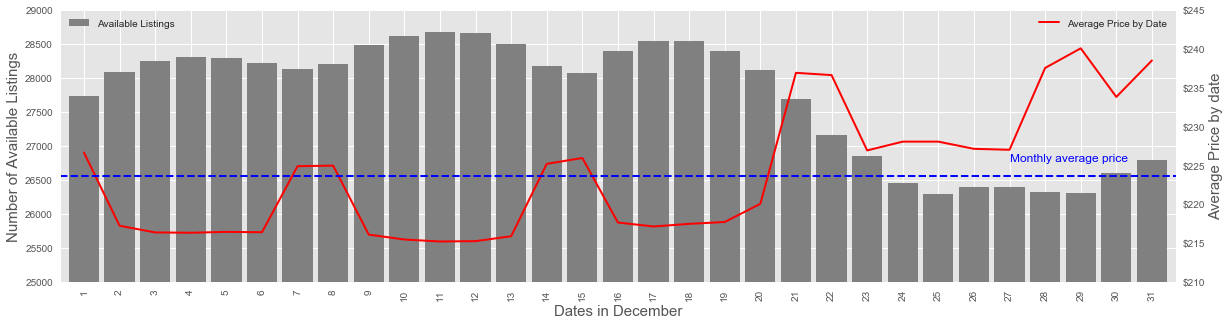

In [83]:
# Your code to answer Question 1
avi_by_day=dec_avi.groupby(by=["day"]).price.agg(["count","mean","std"])\
                  .reset_index(drop=False).rename(index = str,\
                       columns = {"day":"Date",\
                                  "count":"Available Listings",\
                                  "mean":"Average Price by Date",\
                                  "std":"Price Fluctuation"})
# avi_by_day.head()
fig = plt.figure()
avi_num = fig.add_subplot(111)
avi_price = avi_num.twinx()

avi_num=avi_by_day.plot(kind='bar',x="Date",y="Available Listings",ax=avi_num,color="gray",figsize=(20,5),width=0.85)
avi_num.set_ylim(25000,29000)
avi_num.set(xlabel="Dates in December", ylabel="Number of Available Listings")
avi_num.legend(loc=2)
avi_num.yaxis.label.set_fontsize(15)
avi_num.xaxis.label.set_fontsize(15)

avi_price=avi_by_day.plot(kind='line',y='Average Price by Date',ax=avi_price,color="red",figsize=(20,5),linewidth=2)
avi_price.grid(False)
avi_price.set(ylabel="Average Price by date")
avi_price.yaxis.label.set_fontsize(15)
avi_price.legend(loc=1)
avi_price.set_ylim(210,245)

mean_price = dec_avi["price"].mean()

def dates(x, pos):
    actual_date=int(x+1)
    return actual_date

format_date = FuncFormatter(dates)
avi_num.xaxis.set_major_formatter(format_date)

def money(y, pos):
    price = "$%d"%y
    return price
format_price = FuncFormatter(money)
avi_price.yaxis.set_major_formatter(format_price)

avi_price.axhline(y=mean_price,color="b",linestyle="--",linewidth=2)
avi_price.text(26,225.5,"Monthly average price", fontsize=12, color = "b")

(100, 270)

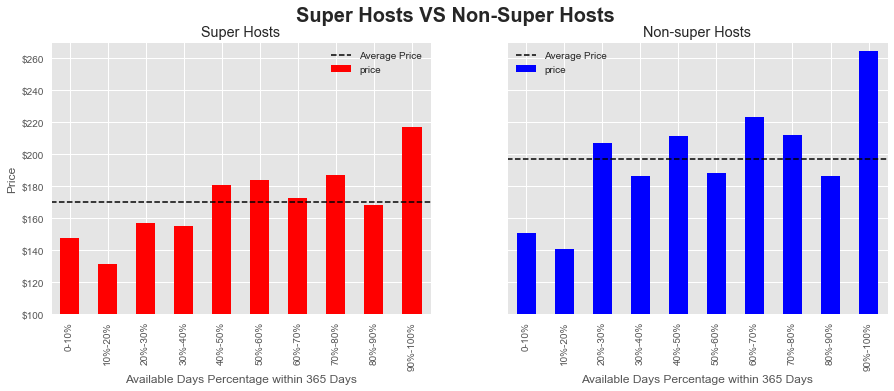

In [84]:
# Your code to answer Question 2

listings = pd.read_csv("listings.csv")
listings["price"] = listings["price"].apply(lambda x:float(str(x).replace("$","").replace(",","")))
#find out the percentage for the "availability_365"
listings["perc365"] = listings.availability_365/365

#find out the range for the percentages
def availability(percentage):
    if percentage <=1 and percentage >=0.9:
        availability = '90%-100%'
    elif percentage <=0.9 and percentage>=0.8:
        availability = '80%-90%'
    elif percentage <=0.8 and percentage>=0.7:
        availability = '70%-80%'
    elif percentage <=0.7 and percentage>=0.6:
        availability = '60%-70%'
    elif percentage <=0.6 and percentage>=0.5:
        availability = '50%-60%'
    elif percentage <=0.5 and percentage>=0.4:
        availability = '40%-50%'
    elif percentage <=0.4 and percentage>=0.3:
        availability = '30%-40%'
    elif percentage <=0.3 and percentage>=0.2:
        availability = '20%-30%'
    elif percentage <=0.2 and percentage>=0.1:
        availability = '10%-20%'
    else:
        availability = '0-10%'
    return availability

listings["availability"] = listings["perc365"].apply(availability)
#divide the dataset to superhost and nonhost
superhost = listings.loc[listings.host_is_superhost == "t",["host_is_superhost","availability","price"]]\
                    .reset_index(drop=True)
nonhost = listings.loc[listings.host_is_superhost == "f",["host_is_superhost","availability","price"]]\
                  .reset_index(drop=True)
superhost = superhost.groupby(["host_is_superhost","availability"]).price.mean().reset_index()
nonhost = nonhost.groupby(["host_is_superhost","availability"]).price.mean().reset_index()

#plotting 
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
plt.style.use("ggplot")
fig,(ax0,ax1) = plt.subplots(nrows =1,ncols=2,sharey = True, figsize=(15,5))
fig.suptitle('Super Hosts VS Non-Super Hosts',fontsize = 20,fontweight = 'bold')
#ax0
superhost.plot(kind = "bar",y = "price", x = "availability",ax=ax0, color = "red")
ax0.set(title = "Super Hosts",xlabel = "Available Days Percentage within 365 Days",ylabel = "Price")
mean_t = superhost.price.mean()
ax0.axhline(y=mean_t,color = 'black',label = 'Average Price',linestyle='--',linewidth= 1.5)
ax0.legend(loc=0)
#ax1
nonhost.plot(kind = "bar",y = "price", x = "availability",ax=ax1,color="blue")
ax1.set(title = "Non-super Hosts",xlabel = "Available Days Percentage within 365 Days",ylabel = "Price")
ax1
mean_f = nonhost.price.mean()
ax1.axhline(y=mean_f,color = 'black',label = 'Average Price',linestyle='--',linewidth= 1.5)
ax1.legend(loc=0)

#put "$" in the y axis
def currency(y,pos):
    """Input y is the axis and pos is the position"""
    new_label = "$%d"%y
    return new_label
formatter = FuncFormatter(currency)
ax0.yaxis.set_major_formatter(formatter)
ax1.yaxis.set_major_formatter(formatter)
#focus on the 100-270 of price 
ax0.set_ylim(100,270)

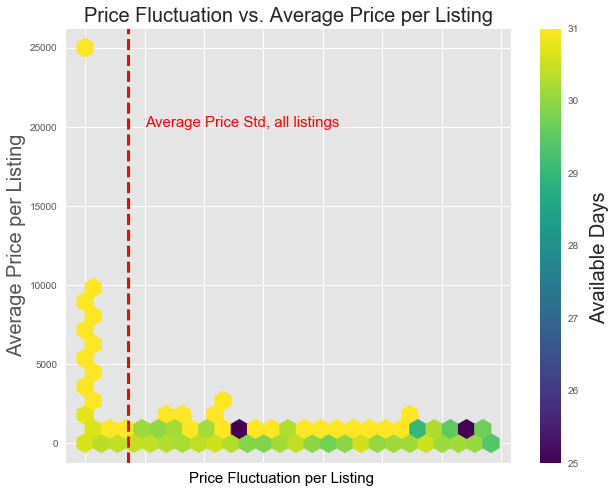

In [85]:
# Your code to answer Question 3
listing_summary = dec_avi.groupby(by = ["listing_id"]).price.agg(["mean","std","count"])

listing_summary = listing_summary.reset_index(drop=False)\
              .rename(index = str, columns = {"listing_id":"listing_id","mean":"Avg_price per Listing",\
                                              "std":"Price_std per Listing",\
                                              "count":"Available Days per Listing"})
#listing_summary.head()
val_listing = listing_summary.sort_values(by=["Available Days per Listing","Price_std per Listing",\
                                              "Avg_price per Listing"],ascending = [False,True,False])\
                                            .loc[(listing_summary["Available Days per Listing"] \
                                                  >=(listing_summary["Available Days per Listing"].max()*0.8))\
                               &(listing_summary["Price_std per Listing"] <= \
                                 (listing_summary["Price_std per Listing"].mean()))].reset_index(drop=True)
good_listing=val_listing.plot.hexbin(x='Price_std per Listing',\
                            y='Avg_price per Listing',\
                            C='Available Days per Listing',\
                            colormap='viridis',\
                            gridsize=25,\
                            figsize=(10,8))

mean_fluct = val_listing["Price_std per Listing"].mean()
good_listing.axvline(x=mean_fluct, color="r", linestyle='--',linewidth=3)

good_listing.text(2,20000,"Average Price Std, all listings",fontsize=15,color='r')
good_listing.text(3.5,-2500,"Price Fluctuation per Listing",fontsize=15,color='black')
good_listing.text(17,15000,"Available Days",rotation="vertical",fontsize=20)

good_listing.set(ylabel="Average Price per Listing")

good_listing.set(title="Price Fluctuation vs. Average Price per Listing")
good_listing.yaxis.label.set_fontsize(20)
good_listing.title.set_fontsize(20)

Text(0.5,1,'Which Neighbourhood Has the Most Good-reviewed Hosts?')

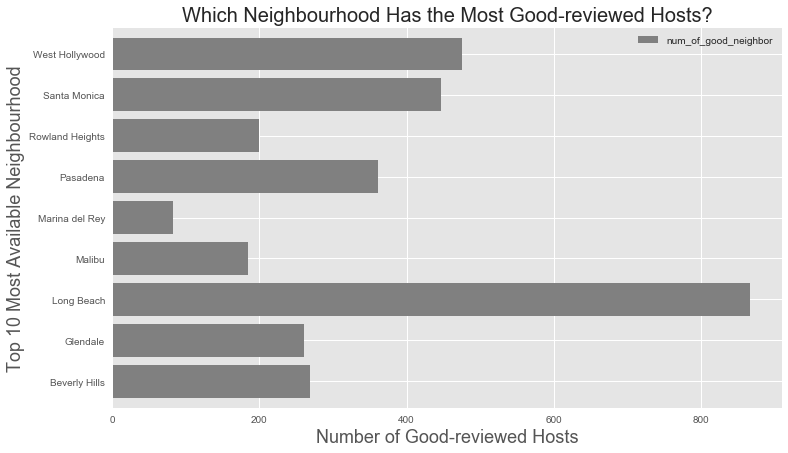

In [86]:
# Your code to answer Question 4
df_listing = pd.read_csv("listings.csv")
#define hosts with average review_score_values greater than the avg_review_value among all the listings as good hosts
avg_review_value=df_listing.review_scores_value.mean()
avg_review_per_host = df_listing.groupby("host_id").review_scores_value.mean().reset_index()
good_host = avg_review_per_host.loc[avg_review_per_host["review_scores_value"]>= avg_review_value,:]
good_hostlist=good_host["host_id"].values.tolist()
#put good hosts into a list

most_available_ten_cities = df_listing.loc[df_listing["has_availability"]=="t",:].city.value_counts().\
                            reset_index()["index"].values.tolist()[0:10]
#find  neighborhood with good_reviews and also in the most available cities
good_host_neighbour=df_listing.loc[(df_listing["neighbourhood_cleansed"].isin(most_available_ten_cities))&\
                                   (df_listing["host_id"].isin(good_hostlist)),["host_id","neighbourhood_cleansed"]]
good_neighbor=good_host_neighbour.groupby("neighbourhood_cleansed").host_id.count().reset_index()
good_neighbor=good_neighbor.rename(columns={"host_id":"num_of_good_neighbor"})
fig_nei,ax_nei=plt.subplots(figsize=(12,7))
good_neighbor.plot(kind="barh",x="neighbourhood_cleansed",y="num_of_good_neighbor",ax=ax_nei,width = 0.8,color="grey")

ax_nei.set_ylabel("Top 10 Most Available Neighbourhood")
ax_nei.yaxis.label.set_fontsize(18)

ax_nei.set_xlabel("Number of Good-reviewed Hosts")
ax_nei.xaxis.label.set_fontsize(18)

ax_nei.set_title("Which Neighbourhood Has the Most Good-reviewed Hosts?",fontsize=20)

Text(32,4.5,'Price')

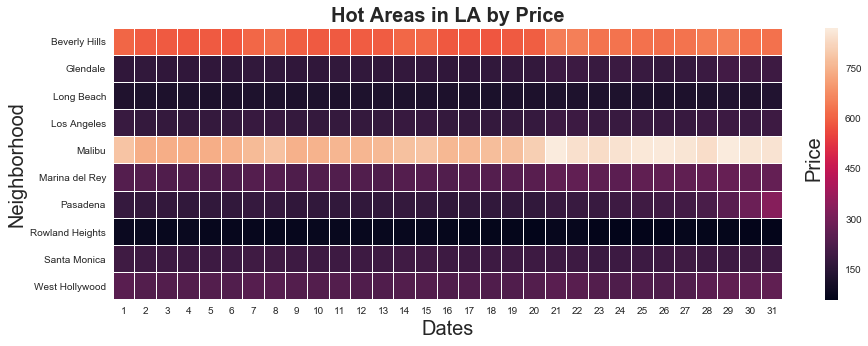

In [87]:
# Your code to answer Question 5
# find the most available ten cities in the list using value_counts()

nextavailable=df_calendar.merge(hostlisting,how="inner",left_on="listing_id",right_on="id")

nextavailable['date']=nextavailable["date"].apply(lambda x: x.day)
good_available=nextavailable.loc[nextavailable["host_id"].isin(good_hostlist),:]
top_available=good_available.loc[good_available["city"].isin(most_available_ten_cities),:]

top=top_available.groupby(by=["date","city"]).price.mean().reset_index()
sns.set()

heats = top.pivot("city", "date", "price")


f, hot_area = plt.subplots(figsize=(15,5))
sns.heatmap(heats, annot=False, fmt="f", linewidths=.10, ax=hot_area)
hot_area.set(title="Hot Areas in LA by Price")
hot_area.title.set_fontsize(20)
hot_area.title.set_fontweight("bold")
hot_area.set(ylabel="Neighborhood")
hot_area.yaxis.label.set_fontsize(20)
hot_area.set(xlabel="Dates")
hot_area.xaxis.label.set_fontsize(20)
hot_area.text(32,4.5,"Price",rotation="vertical",fontsize=20)

## Executive Summary
**(You need to use this cell to write your executive summary)**

**TO:**           Professor Zhang  
**FROM:**         Team 45 - Sandy Sun (467065), Jenny Wang (467066), Xinying Li (467067)  
**SUBJECT:**      2018 Christmas Tourist Recommendation Based on Airbnb Data Analysis  
**DATE:**         Nov. 28th, 2018  

--------------------------------------------------------------------------------------------------------

For this project, we analyzed the available listings in December and their expected price change. We also evaluated review scores and listing prices for LA hosts to recommend ideal neighborhood for tourists. Some analysis result is list below:

**1. Listings with more availability are more ideal for tourists due to lower price fluctuation:** overall, the price is expected to rise and fluctuated more towards Christmas, and the overall availability is expected to decrease (Question 1). However, the listing with more available days is more likely to maintain a stable price, therefore making this type of listing ideal for tourist to book (Question 2 & 3). 

**2. Listings in Long Beach areas are more ideal for tourists due to lower price and higher reviews:** Long Beach area is the neighborhood with the greatest number of good-reviewed hosts (Question 4). Moreover, the average price is low and is expected to maintain more stable across December (Question 5). Therefore, for tourists prefer high-review properties and with economic concern, listings/hosts in Long Beach are ideal in December. 

For Airbnb, they can promote Long Beach’s properties to target customers whose profiles prefer cheaper property with good quality to boost revenue for next month.